 🧾 Project Title: Customer Segmentation Using K-Means Clustering

📌 Objective

To identify distinct groups of customers based on their demographic and spending behavior using the K-Means clustering algorithm. 
This segmentation will help businesses understand their customer base better and implement more effective, personalized marketing strategies.


🎯 Goals

1. Load and understand the dataset – Explore customer data to identify relevant features.
2. Clean and preprocess the data – Handle missing values, encode categorical data, and normalize features.
3. Determine the optimal number of clusters – Use the Elbow Method to identify the best value for `k`.
4. Apply K-Means Clustering – Train a K-Means model to segment customers into groups.
5. Visualize the clusters – Create 2D/3D visual representations of the customer groups.
6. Interpret and analyze each segment – Understand what makes each group unique.
7. Provide business insights – Recommend actionable strategies based on the segmentation results.


🧰 Tools & Technologies

- Python Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn
- Algorithm: K-Means Clustering (unsupervised machine learning)
- Environment: Jupyter Notebook


📊 Dataset Overview

Filename: `Mall_Customers.csv`

Columns (likely):
- `CustomerID`: Unique ID assigned to each customer
- `Gender`: Male/Female
- `Age`: Age of the customer
- `Annual Income (k$)`: Yearly income in thousands of dollars
- `Spending Score (1-100)`: Score assigned by the mall based on customer spending behavior and loyalty

📈 Why Customer Segmentation?

- Helps tailor marketing campaigns to different customer types
- Improves customer satisfaction and loyalty through personalization
- Identifies high-value customers for special attention
- Optimizes resource allocation in marketing and sales


✅ Expected Outcomes

- Clear segmentation of customers into meaningful groups (e.g., budget shoppers, high-income big spenders, etc.)
- Visualizations to illustrate the nature and size of each cluster
- Business insights derived from each segment’s profile
- Reproducible notebook and clean codebase for future use or adaptation

In [33]:
#Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

✅ Step 1: Load and Inspect the Dataset

In [9]:
#Load the Dataset
df = pd.read_csv(r'C:\Users\Sam_Ke\Downloads\Mall_Customers.csv')

# Display the first few rows of the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#Display dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


🧹 Step 2: Data Preprocessing

2.1 👉 Check for Missing Values

In [15]:
# Check for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

2.2 👉 Drop Unnecessary Columns

In [17]:
#CustomerID is a unique indentifier not useful in Clustering.
df = df.drop('CustomerID', axis=1)

2.3 👉 Encode Categorical Variables

In [19]:
# Encode Gender: Female = 0, Male = 1
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

2.4 👉 Feature Scaling (Standardization)

In [23]:
#Clustering algorithms are distance-based, so it’s important that all features are on the same scale.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

# Check scaled data
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


📍 Step 3: Determine the Optimal Number of Clusters (K)

K-Means requires us to specify the number of clusters, k, beforehand. 
The Elbow Method helps us find a good value by looking at the Within-Cluster Sum of Squares (WCSS).

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

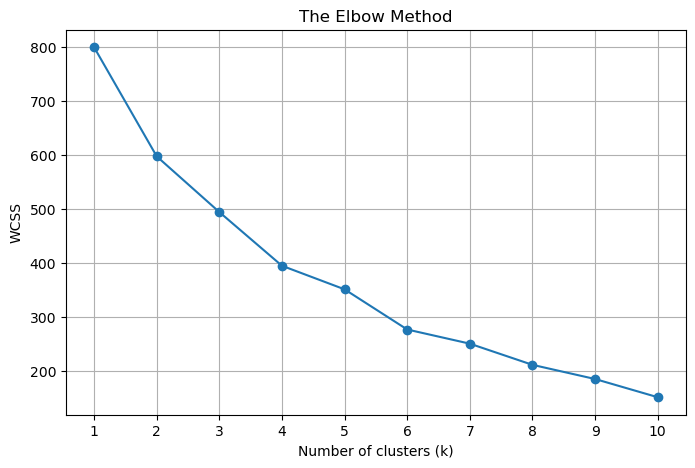

In [27]:
# List to store the WCSS for each k
wcss = []  

# Try different values of k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
#5 clusters is a good choice for our K-Means model

⏭️ Next: Step 4 – Apply K-Means Clustering

In [29]:
#K-Means model using k=5
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original (unscaled) DataFrame for interpretation
df['Cluster'] = y_kmeans

# Preview the data with clusters
df.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


🧭 Step 5: Visualizing the Clusters

Visualizing the clusters in 2D using PCA (Principal Component Analysis) to reduce dimensionality.

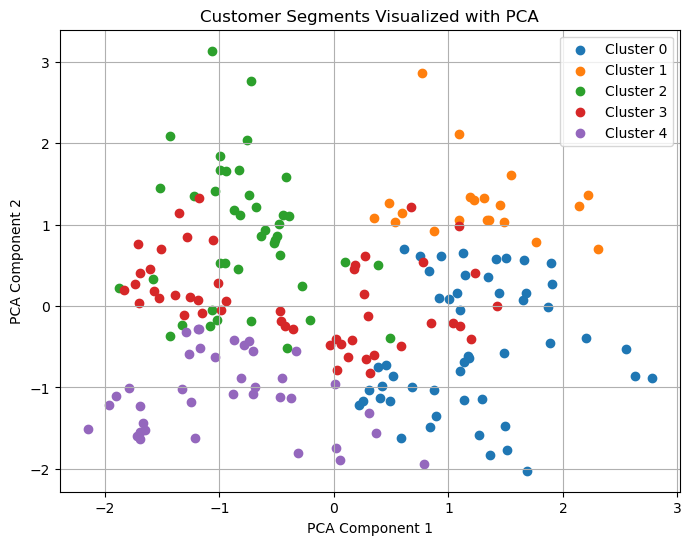

In [35]:
# Reduce to 2 components for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

# Create a new DataFrame for visualization
pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PCA1'],
        pca_df[pca_df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

🧠 Step 6: Interpret and Analyze the Clusters

This step is about understanding the characteristics of each cluster to derive actionable business insights.

📋 First: Get Summary Statistics by Cluster (Average Gender, Age, Income, and Spending Score per cluster)

In [37]:
# Group by cluster and show mean values
df.groupby('Cluster').mean(numeric_only=True)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.509804,56.470588,46.098039,39.313725
1,1.000000,39.500000,85.150000,14.050000
2,1.000000,28.690476,60.904762,70.238095
3,0.000000,37.897959,82.122449,54.448980
4,0.000000,27.315789,38.842105,56.210526


Cluster    | Gender | Age | Income (k$) | Spending Score | 🧾 Interpretation
0 | ~50/50  | 56.5  | 46.1 | 39.3 | 🧓 Older, moderate earners, average spenders. May prefer traditional marketing or value offers. Could be brand-loyal.
1 | 100% ♂️ | 39.5  | 85.1 | 14.1 | 💼 High-income males who spend little. Possibly conservative spenders — upsell premium services or personalized experiences.
2 | 100% ♂️ | 28.7  | 60.9 | 70.2 | 🧨 Young, high spenders with moderate income. Target with lifestyle & experience-driven marketing. Likely impulse buyers.
3 | 100% ♀️ | 37.9  | 82.1 | 54.4 | 💎 High-income females with good spending. Premium customers — perfect for loyalty programs, VIP events.
4 | 100% ♀️ | 27.3  | 38.8 | 56.2 | 🛍️ Young females, lower income, but spend well. Likely deal-seekers — attract with promotions, trendy products, and social media.

Five customer segments were identified:
- Cluster 0: Older, balanced gender, average income, moderate spending.
- Cluster 1: High-income males, low spending.
- Cluster 2: Young males, moderate income, high spending.
- Cluster 3: High-income females, medium-high spending.
- Cluster 4: Young females, low income, good spending.

📊 Step 7 :- Strategic Actions
🎯 Marketing & Business Recommendations:
Cluster 0: Offer senior benefits, loyalty discounts, or bundle deals.

Cluster 1: Engage with exclusive experiences or financial products, not just discounts.

Cluster 2: Highlight trendy, aspirational products — these are active spenders!

Cluster 3: Strong candidates for premium loyalty tiers. Prioritize retention.

Cluster 4: Use Instagram/Snapchat-style promotions or influencer campaigns to drive further spending.